In [5]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set()

In [2]:
np.random.seed(2727)
D = np.random.normal(size=(6, 2))
z = np.array([-2.4, 0.01])
x = D.dot(z)

L = np.linalg.norm(D, ord=2)**2

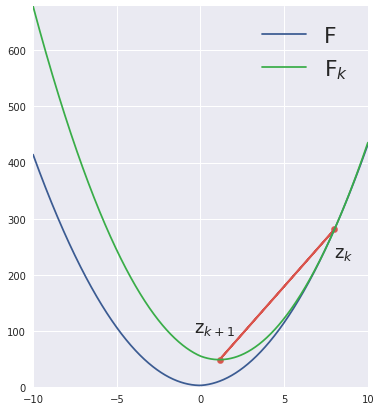

In [6]:
zk = np.array([-2, 8])

t = np.linspace(-10, 10, 1001)
i0 = np.argmax(t == zk[1])
y = np.array([[zk[0], tt] for tt in t])
xx = D.dot(y.T)


r = x[:, None] - xx
f = np.sum(r*r, axis=0)/2 + abs(t) + abs(zk[0])
rk = x - D.dot(zk)
rkk = -(y - zk[None, :])
fk = np.sum(rk*rk)/2 + (rk).dot(D.dot(rkk.T))
fk += L*np.sum(rkk*rkk, axis=1)/2 + abs(t) + abs(zk[0])
fig = plt.figure()
fig.set_size_inches(6, 7)
fig.patch.set_alpha(0.0)
plt.plot(t, f, sns.xkcd_rgb["denim blue"], label='F')
plt.plot(t, fk, sns.xkcd_rgb["medium green"], label='F$_k$')
plt.scatter(zk[1], fk[i0], s=40, c=sns.xkcd_rgb["pale red"])
plt.text(zk[1], fk[i0]-50, "z$_k$", fontsize=18)
i1 = fk.argmin()
plt.scatter(t[i1], fk[i1], s=40, c=sns.xkcd_rgb["pale red"])
plt.text(t[i1]-1.5, fk[i1]+50, "z$_{k+1}$", fontsize=18)
plt.arrow(zk[1], fk[i0], t[i1]-zk[1], fk[i1] - fk[i0], color=sns.xkcd_rgb["pale red"], lw=2)
plt.xlim((-10, 10))
plt.ylim((0, max(fk.max(), f.max())))
plt.xticks([-10, -5, 0, 5, 10])
plt.legend(fontsize=22)

plt.savefig('ista_step.pdf', dpi=150)
